<a href="https://colab.research.google.com/github/paulasijit/stockmarket/blob/main/Stock_Market_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
dataset = pd.read_csv('/content/sample_data/KREBSBIO.NS.csv',index_col="Date",parse_dates=True)


In [ ]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-28,97.879204,97.879204,97.397102,97.397102,97.397102,191.0
2016-11-01,93.636200,99.325699,93.636200,98.747101,98.747101,62.0
2016-11-02,94.504097,95.468399,94.504097,94.504097,94.504097,207.0
2016-11-03,98.168503,98.168503,98.168503,98.168503,98.168503,51.0
2016-11-04,93.346901,93.346901,93.346901,93.346901,93.346901,114.0


In [ ]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1028 entries, 2016-10-28 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1026 non-null   float64
 1   High       1026 non-null   float64
 2   Low        1026 non-null   float64
 3   Close      1026 non-null   float64
 4   Adj Close  1026 non-null   float64
 5   Volume     1026 non-null   float64
dtypes: float64(6)
memory usage: 56.2 KB


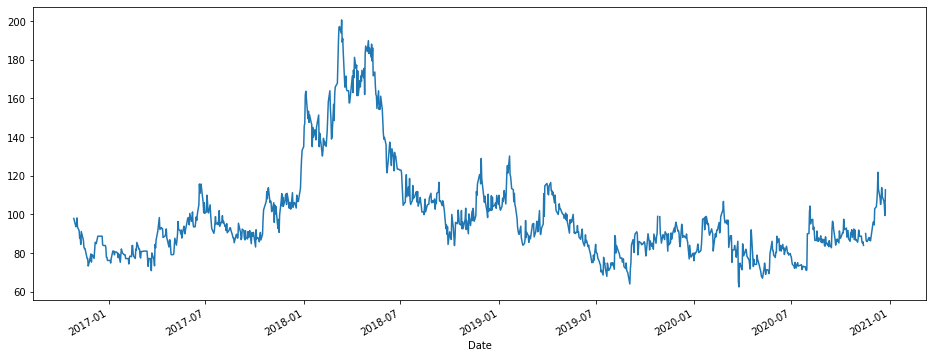

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"]

In [ ]:
dataset["Volume"] = dataset["Volume"]

In [ ]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-28,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-03,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-08,93.842829,95.619944,93.705086,95.261786,95.261786,268.428571
2016-11-09,92.554771,94.331886,92.485900,94.042601,94.042601,273.714286
2016-11-10,91.239158,93.160929,91.170286,92.954300,92.954300,294.571429


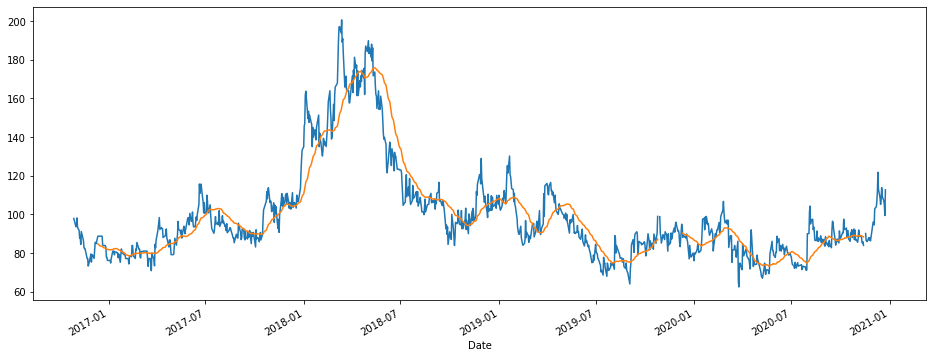

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

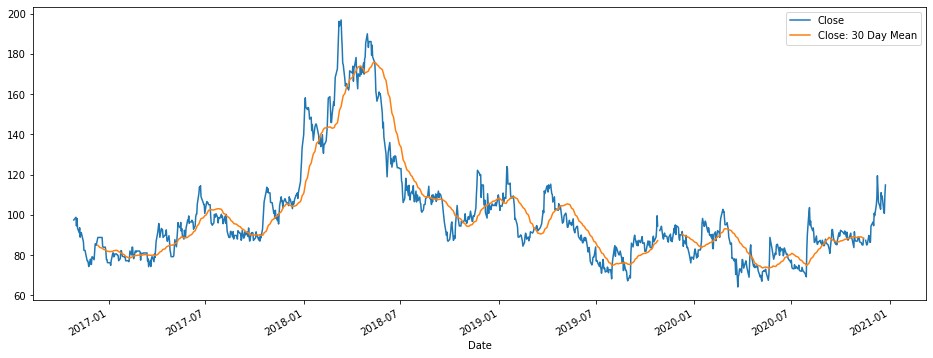

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

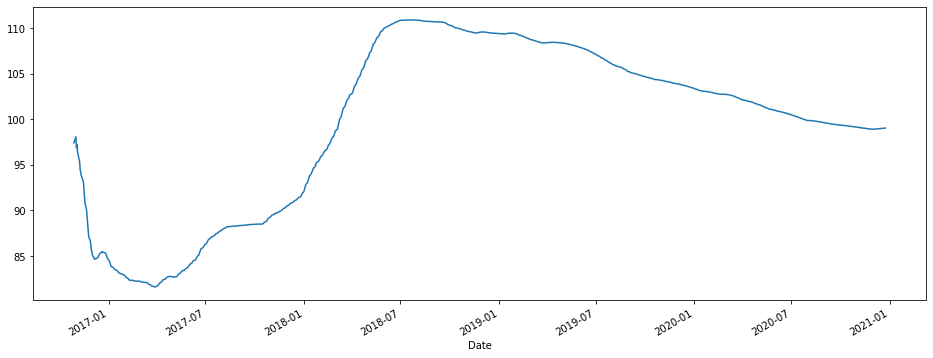

In [ ]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [ ]:
# Initialising the RNN
from keras.models import Sequential
regressor = Sequential()



In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
from keras.layers import Dense,LSTM,Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
24/24 [==============================] - 8s 123ms/step - loss: nan
Epoch 2/100
24/24 [==============================] - 3s 119ms/step - loss: nan
Epoch 3/100
24/24 [==============================] - 3s 146ms/step - loss: nan
Epoch 4/100
24/24 [==============================] - 3s 123ms/step - loss: nan
Epoch 5/100
24/24 [==============================] - 3s 119ms/step - loss: nan
Epoch 6/100
24/24 [==============================] - 3s 138ms/step - loss: nan
Epoch 7/100
24/24 [==============================] - 3s 130ms/step - loss: nan
Epoch 8/100
24/24 [==============================] - 3s 133ms/step - loss: nan
Epoch 9/100
24/24 [==============================] - 3s 122ms/step - loss: nan
Epoch 10/100
24/24 [==============================] - 3s 132ms/step - loss: nan
Epoch 11/100
24/24 [==============================] - 3s 123ms/step - loss: nan
Epoch 12/100
24/24 [==============================] - 3s 128ms/step - loss: nan
Epoch 13/100
24/24 [=============================

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2020
dataset_test = pd.read_csv('/content/sample_data/KREBSBIO.NS.csv',index_col="Date",parse_dates=True)



In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-28,97.879204,97.879204,97.397102,97.397102,97.397102,191.0
2016-11-01,93.636200,99.325699,93.636200,98.747101,98.747101,62.0
2016-11-02,94.504097,95.468399,94.504097,94.504097,94.504097,207.0
2016-11-03,98.168503,98.168503,98.168503,98.168503,98.168503,51.0
2016-11-04,93.346901,93.346901,93.346901,93.346901,93.346901,114.0


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1028 entries, 2016-10-28 to 2020-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1026 non-null   float64
 1   High       1026 non-null   float64
 2   Low        1026 non-null   float64
 3   Close      1026 non-null   float64
 4   Adj Close  1026 non-null   float64
 5   Volume     1026 non-null   float64
dtypes: float64(6)
memory usage: 56.2 KB


In [ ]:
dataset_test["Volume"] = dataset_test["Volume"]

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1028 entries, 2016-10-28 to 2020-12-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1026 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 500):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       0 non-null      float32
dtypes: float32(1)
memory usage: 1.8 KB


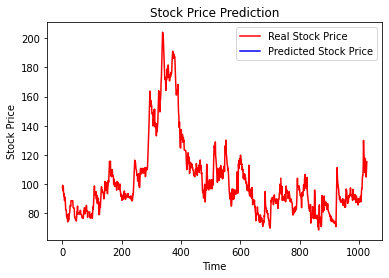

In [ ]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
